# Introducción a Algoritmos Supervisados de Machine Learning
** Guillermo Orozco - *@orozcorgmx* **

## Conceptos básicos de Machine Learning

Antes de comenzar a estudiar los algoritmos supervisados, haremos un repaso por algunos conceptos básicos, como los tipos de variables, correlación y algunas bibliotecas que se ocupan de forma común en el análisis de datos.

### Bibliotecas de Python en el análsis de datos

Existen cuatro bibliotecas básicas más usadas en el análisis de datos que son las que se usarán durante este curso:
1. NumPy
2. SciPy
3. Matplotlib
4. Pandas

### NumPy

Es la biblioteca para cómputo científico de Python, provee herramientas para trabajar con arreglos multidimensionales. En este curso sólo se verán algunas herramientas básicas cuando sea necesario, para una referencia completa vea las [Referencias de NumPy](https://docs.scipy.org/doc/numpy/reference/) provee una excelente referencia.

### Pandas

Pandas es una biblioteca que provee estructuras para trabajar con datos relacionales o "Etiquetados" de manera facil e intuitiva. Pandas introduce los ***DataFrame*** que es un objeto bidimensional similar a una hoja de cálculo o una tabla SQL. a partir de aquí veremos cómo se usa pandas desarrollando varios ejemplos.

In [1]:
#Importamos Pandas
import pandas as pd

#leemos un archivo CSV
df=pd.read_csv('./datasets/Titanic/train.csv', index_col = False)

#Mostramos las primeras líneas del archivo CSV
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Función describe()
Esta función nos muestra las siguientes estadísticas básicas de nuestro archivo:
* Conteo
* Promedio
* Desviación estandard
* Mínimo
* Primer Cuartil
* Mediana
* Tercer cuartil
* Máximo

In [2]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Función cov()
La covarianza indica cómo se relacionan dos variables. Una covarianza positiva significa que las variables están relacionadas positivamente, mientras que una covarianza negativa significa que las variables están inversamente relacionadas. El inconveniente de la covarianza es que no informa el grado de relación positiva o negativa

In [3]:
df.cov()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,66231.000000,-0.626966,-7.561798,138.696504,-16.325843,-0.342697,161.883369
Survived,-0.626966,0.236772,-0.137703,-0.551296,-0.018954,0.032017,6.221787
Pclass,-7.561798,-0.137703,0.699015,-4.496004,0.076599,0.012429,-22.830196
Age,138.696504,-0.551296,-4.496004,211.019125,-4.163334,-2.344191,73.849030
SibSp,-16.325843,-0.018954,0.076599,-4.163334,1.216043,0.368739,8.748734
Parch,-0.342697,0.032017,0.012429,-2.344191,0.368739,0.649728,8.661052
Fare,161.883369,6.221787,-22.830196,73.849030,8.748734,8.661052,2469.436846


#### Función corr()
La correlación es otra forma de determinar cómo se relacionan dos variables. Además de mostrar si las variables están relacionadas positiva o inversamente, la correlación también indica el grado en que las variables tienden a moverse juntas. Cuando dice que dos elementos se correlacionan, está diciendo que el cambio en un elemento produce un cambio en otro. Siempre hablará de correlación como un rango entre -1 y 1.

In [4]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Para más información acerca de Pandas y sus funciones, puede revisar el [tutorial de Pandas](http://pandas.pydata.org/pandas-docs/stable/tutorials.html).

### Matplotlib

Matplotlib es una extensión matemática numérica de NumPy y un gran paquete para ver o presentar datos en un formato gráfico o pictórico

In [5]:
#Importamos Pyplot de Matplotlib
import matplotlib.pyplot as plt
#Graficamos aplicando directamente a un dataframe
df.hist(); #Historgrama
df.plot(); #Gráfica de Líneas

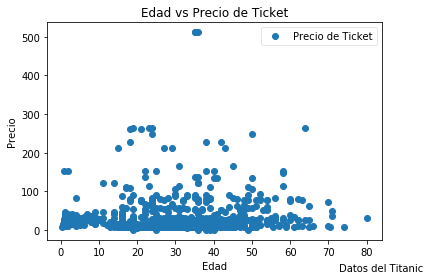

In [6]:
df.plot(x='Age', y='Fare', style='o', label= 'Precio de Ticket');
plt.title('Edad vs Precio de Ticket');
plt.xlabel('Edad');
plt.ylabel('Precio');
plt.figtext(0.995, 0.01, 'Datos del Titanic', ha='right', va='bottom');
plt.legend(loc='best', framealpha=0.5, prop={'size':'medium'});

Para una guía completa de visualización puede ver el [tutorial de Pyplot](https://matplotlib.org/users/beginner.html)

## Bibliotecas de Machine Learning

Python tiene muchas librerias de Machine Learning, entre ellas destacan:
1. Scikit-learn
2. Pylearn2
3. NuPIC
4. Nilearn
5. PyBrain
6. Pattern
7. Fuel
8. Bob
9. Skdata
10. MILK

Para este mini curso usaremos Scikit-learn, que está construido en base a SciPy.
Un libro recomendado es [Python for Data Análisis](http://shop.oreilly.com/product/0636920050896.do)